# **Titanic Survival Analysis**

**By:** José Max Barrios

Panamá

linked-in: [Jose Max Barrios Linked-in](https://www.linkedin.com/in/jos%C3%A9-max-barrios-lara-b27a501aa/)

**Overview**

The data has been split into two groups:


*   Train Set (train.csv)
*   Test Set (test.csv)




The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

## **1 Data Analysis**

In this section all related stuff to data manipulation is done.

In [185]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import joblib
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))
warnings.filterwarnings('ignore')

<Figure size 720x576 with 0 Axes>

In [186]:
#Uploading Files from local computer
train = pd.read_csv('C:\\Users\\Asus\\Desktop\\titanic\\data\\train.csv')
test = pd.read_csv('C:\\Users\\Asus\\Desktop\\titanic\\data\\test.csv')

In [187]:
#function to check data information
def data_check(data):
    shape = data.shape
    naValues = data.isna().sum()
    description = data.describe()
    return shape, naValues, description



#function to extract last Name of Passengers
def get_lastName(Name):
    return Name.split(",")[0]


#Function to extract the alias of the passenger
def get_alias(Name):
    return Name.split(" ")[1].strip(".")



#Function to Convert into categorical variables the Pclass
def Pclass(Pclass):
  if  Pclass == 1:
    return 'First'
  elif Pclass == 2:
    return 'Second'
  else:
    return 'Third'


#Function for survivors
def survivors(person):
  if person == 0:
    return 'DEAD'
  else:
    return 'ALIVE'


#Function to Embar Places
def embark(place):
  if place == 'S':
    return 'Southampton'
  elif place == 'Q':
    return 'Queenstown'
  else:
    return 'Cherbourg'

### **1.1 Data Wrangling and Augmentation**

In [188]:
#Droppinng the Cabin ,Ticket and PassengerID Columns
train.drop(columns=['Ticket','Cabin','PassengerId'],inplace=True)
test.drop(columns=['Ticket','Cabin'],inplace=True)


#Filling NaN values with average years
train.fillna(train.mean(), inplace=True)
test.fillna(train.mean(), inplace=True)

#Dropping the two rows with na values of train test
train.dropna(inplace=True)

# Create a column with the last name of the passengers
train['lastName'] = train['Name'].apply(get_lastName)

# Create a column with the Alias of the passengers
train['Alias'] = train['Name'].apply(get_alias)

#Replacing Embarked Place column values with actual names
train['Embarked'] = train.Embarked.apply(embark)

### **1.2 Data Visualization**

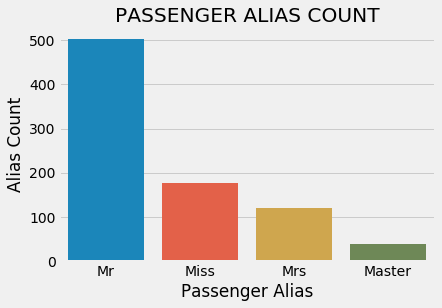

In [189]:
#Extraccting the Alias
alias = train['Alias'].value_counts()
alias = alias.head(4)
alias = pd.DataFrame(alias)
alias.columns = ['Alias Count']

#Plot Alias count
sns.barplot(data=alias, x=alias.index, y='Alias Count')
plt.xlabel('Passenger Alias')
plt.title('PASSENGER ALIAS COUNT')
plt.show()

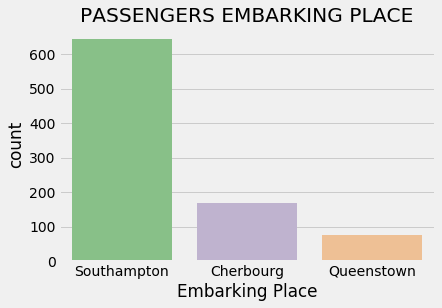

In [190]:
#Plot embarking place count
sns.countplot(data=train, x='Embarked',palette='Accent')
plt.xlabel('Embarking Place')
plt.title('PASSENGERS EMBARKING PLACE')
plt.show()

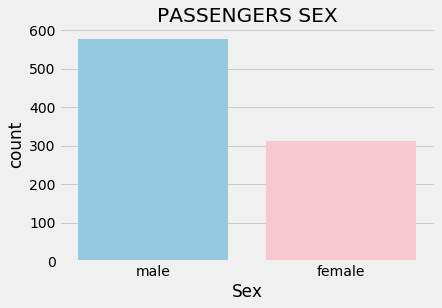

In [191]:
#Plot sex count
sex_color = ['skyblue', 'pink']
sns.countplot(data=train, x='Sex',palette=sex_color)
plt.xlabel('Sex')
plt.title('PASSENGERS SEX')
plt.show()

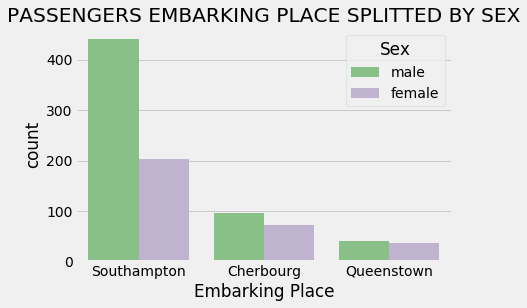

In [192]:
#Plot embarking place count
sns.countplot(data=train, x='Embarked',palette='Accent',hue='Sex')
plt.xlabel('Embarking Place')
plt.title('PASSENGERS EMBARKING PLACE SPLITTED BY SEX')
plt.show()

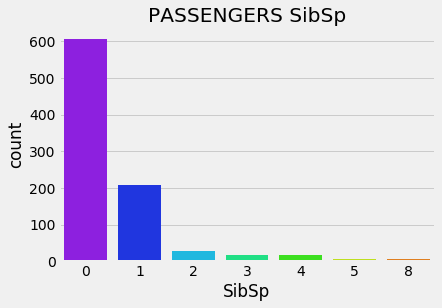

In [193]:
#Plot Passenger SibSp
sns.countplot(data=train, x='SibSp',palette='gist_rainbow_r')
plt.xlabel('SibSp')
plt.title('PASSENGERS SibSp')
plt.show()

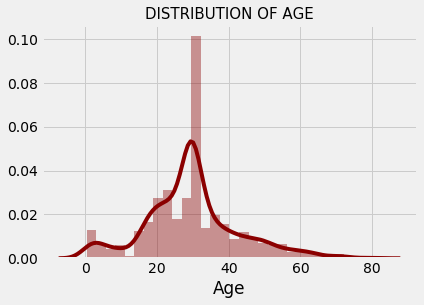

In [194]:
#Age Distribution
sns.distplot(train['Age'], color = 'darkred')
plt.title('DISTRIBUTION OF AGE', fontsize = 15)
plt.show()

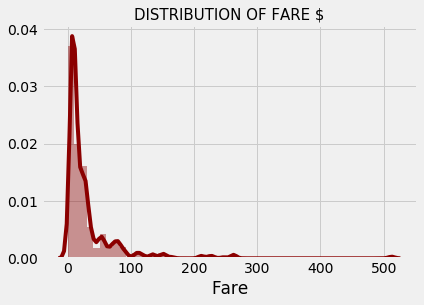

In [195]:
#Fare Distribution
sns.distplot(train['Fare'], color = 'darkred')
plt.title('DISTRIBUTION OF FARE $', fontsize = 15)
plt.show()

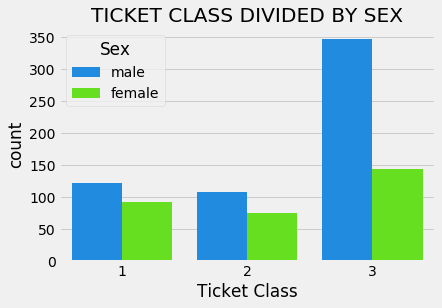

In [196]:
#Plot embarking place count
sns.countplot(data=train, x='Pclass',palette='gist_rainbow_r',hue='Sex')
plt.xlabel('Ticket Class')
plt.title('TICKET CLASS DIVIDED BY SEX')
plt.show()

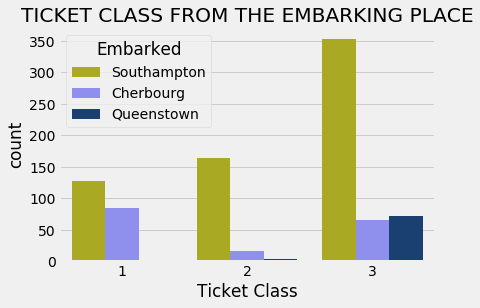

In [197]:
#Plot embarking place count
sns.countplot(data=train, x='Pclass',palette='gist_stern_r',hue='Embarked')
plt.xlabel('Ticket Class')
plt.title('TICKET CLASS FROM THE EMBARKING PLACE')
plt.show()

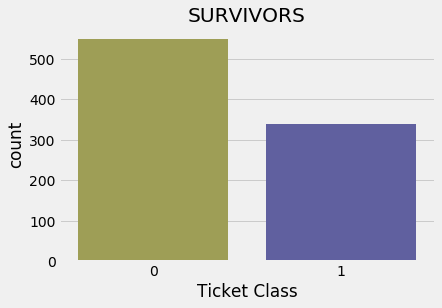

In [198]:
#Plot embarking place count
sns.countplot(data=train, x='Survived',palette='gist_stern_r')
plt.xlabel('Ticket Class')
plt.title('SURVIVORS')
plt.show()

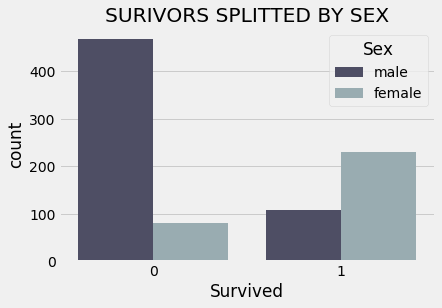

In [199]:
#Plot embarking place count
sns.countplot(data=train, x='Survived',palette='bone',hue='Sex')
plt.xlabel('Survived')
plt.title('SURIVORS SPLITTED BY SEX')
plt.show()

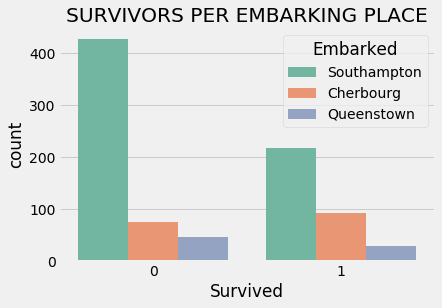

In [200]:
#Plot embarking place count
sns.countplot(data=train, x='Survived',palette='Set2',hue='Embarked')
plt.xlabel('Survived')
plt.title('SURVIVORS PER EMBARKING PLACE')
plt.show()

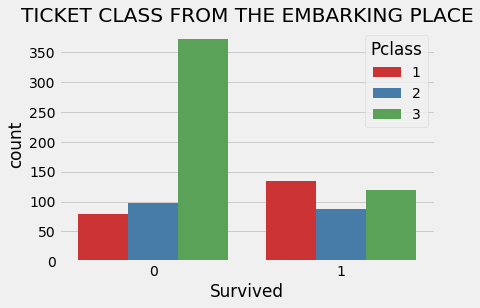

In [201]:
#Plot embarking place count
sns.countplot(data=train, x='Survived',palette='Set1',hue='Pclass')
plt.xlabel('Survived')
plt.title('TICKET CLASS FROM THE EMBARKING PLACE')
plt.show()

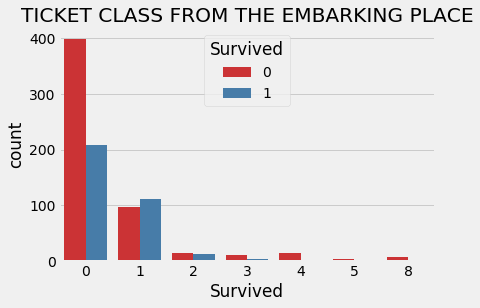

In [202]:
#Plot embarking place count
sns.countplot(data=train, x='SibSp',palette='Set1',hue='Survived')
plt.xlabel('Survived')
plt.title('TICKET CLASS FROM THE EMBARKING PLACE')
plt.show()

### **1.3 Data Preparation for Model**

In [203]:
#Create Dataframe based on the train dataset
model_df = train

#Dropping some useless columns
model_df = model_df.drop(columns=['Alias','Name','lastName'])

# create dymmy variables 
model_df = pd.get_dummies(model_df) 

# Create Categorical Variables for PClass
model_df['Survived'] = model_df['Survived'].apply(survivors)

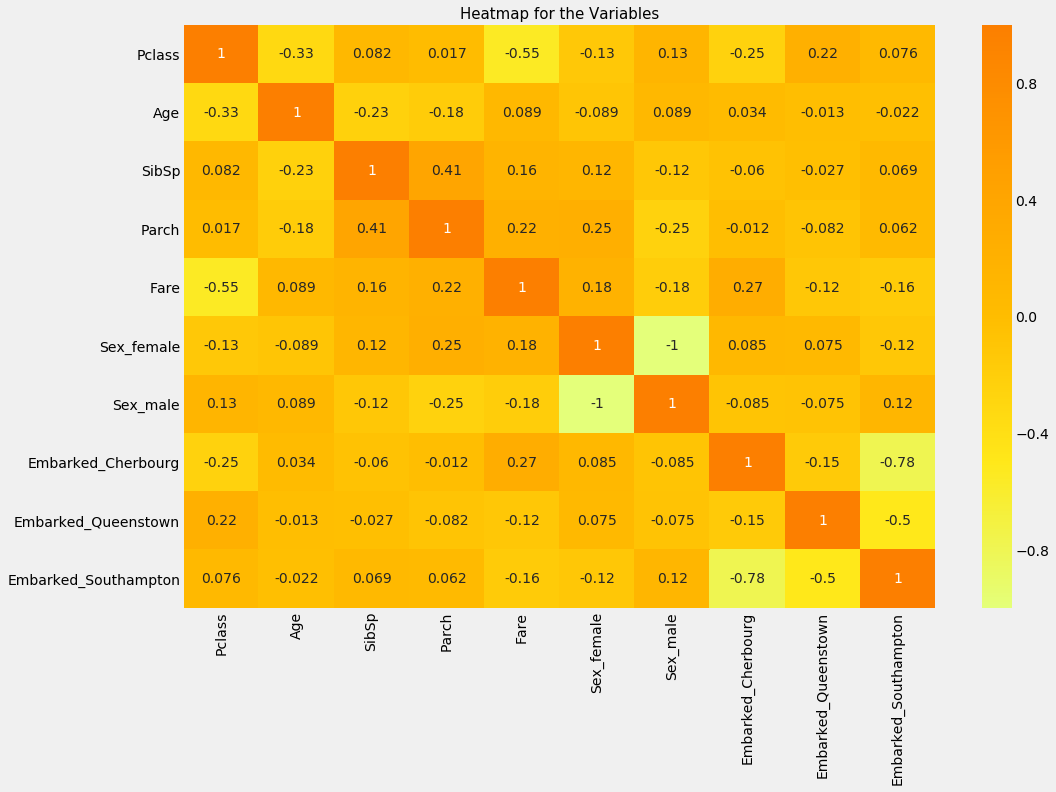

In [204]:
plt.figure(figsize=(15,10))
sns.heatmap(model_df.corr(), annot = True, cmap = 'Wistia')
plt.style.use('fivethirtyeight')
plt.title('Heatmap for the Variables', fontsize = 15)
plt.show()

In [205]:
#Dropping columns
model_df = model_df.drop(columns=['Age','Fare','Embarked_Cherbourg','Embarked_Queenstown','Embarked_Southampton','SibSp','Parch'])

### **1.4 Machine Learning Model**

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier


#Data Splitt
X = model_df.iloc[:,1:6]
y = model_df.Survived.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [207]:
#KNN Model 
knn_classifier = KNeighborsClassifier(n_neighbors=29)
knn_classifier = knn_classifier.fit(X_train,y_train)

#Predict
prediction = knn_classifier.predict(X_test)

#model Accuracy
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))

#Model Check with Random Values
test_knn = [[1,1,0],[1,0,1]]
print(knn_classifier.predict(test_knn))

#Save Model
joblib.dump(knn_classifier, 'knn_model_titanic.joblib')

[[ 52  53]
 [  5 157]]
              precision    recall  f1-score   support

       ALIVE       0.91      0.50      0.64       105
        DEAD       0.75      0.97      0.84       162

    accuracy                           0.78       267
   macro avg       0.83      0.73      0.74       267
weighted avg       0.81      0.78      0.76       267

0.7827715355805244
['ALIVE' 'DEAD']


['knn_model_titanic.joblib']

In [208]:
#RANDOM FOREST CLASSIFIER
def randomForest(X_train, X_test, y_train, y_test):
  random_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
  random_classifier.fit(X_train, y_train)
  random_prediction = random_classifier.predict(X_test)

  #Model Accuracy
  print(confusion_matrix(y_test, random_prediction))
  print(classification_report(y_test, random_prediction))
  print('Model Accuracy: ',accuracy_score(y_test, random_prediction))

  #Testing Model With Random Examples
  rf_test = [[3,1,0],[2,0,1]]
  print('CLASSIFICATION EXAMPLES',random_classifier.predict(rf_test))
  
  #Save Model
  joblib.dump(random_classifier, 'randomforest_model_titanic.joblib')
  return random_classifier

In [209]:
#Calling Function
randomForest(X_train, X_test, y_train, y_test)

[[ 52  53]
 [  5 157]]
              precision    recall  f1-score   support

       ALIVE       0.91      0.50      0.64       105
        DEAD       0.75      0.97      0.84       162

    accuracy                           0.78       267
   macro avg       0.83      0.73      0.74       267
weighted avg       0.81      0.78      0.76       267

Model Accuracy:  0.7827715355805244
CLASSIFICATION EXAMPLES ['DEAD' 'DEAD']


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### **1.5 Test Models on Test Dataset**

In [210]:
#checking dataframe
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [211]:
#Checking Data Structure from test dataset
data_check(test)

((418, 9), PassengerId    0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Fare           0
 Embarked       0
 dtype: int64,        PassengerId      Pclass         Age       SibSp       Parch        Fare
 count   418.000000  418.000000  418.000000  418.000000  418.000000  418.000000
 mean   1100.500000    2.265550   30.154603    0.447368    0.392344   35.619000
 std     120.810458    0.841838   12.636666    0.896760    0.981429   55.840751
 min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
 25%     996.250000    1.000000   23.000000    0.000000    0.000000    7.895800
 50%    1100.500000    3.000000   29.699118    0.000000    0.000000   14.454200
 75%    1204.750000    3.000000   35.750000    1.000000    0.000000   31.500000
 max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200)

In [212]:
#Creating an alternative dataset to analyze
test_data = test

#Dropping Unecessaries columns
test_data = test.drop(columns=['Name', 'Age','SibSp','Parch','Fare','Embarked','PassengerId'])

#creating Dummy variables
test_data = pd.get_dummies(test_data)

#Converting Dataframe to numpy Array
df = test_data.to_numpy()

In [213]:
#Knearest Classifier Model to predict Survivors on test set
test_predictions = knn_classifier.predict(df)

#Creating Dataframe with resuts
survive = pd.DataFrame(test_predictions)
survive.columns = ['Survive']

#Appending survive dataframe to test
test = test.join(survive)

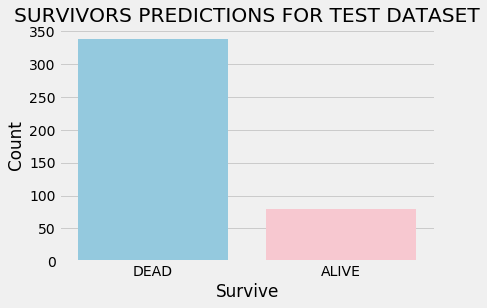

In [214]:
#Survive Predictions
sns.countplot(data=test, x='Survive',palette=sex_color)
plt.title('SURVIVORS PREDICTIONS FOR TEST DATASET')
plt.ylabel('Count')
plt.show()


### **1.6 CSV with PassengerID and Prediction**

In [215]:
#Dropping columns unecessary columns
survivors = test.drop(columns=['Pclass', 'Name','Sex','Age','SibSp','Parch','Fare','Embarked'])

#To CSV File
survivors.to_csv(r'C:\\Users\\Asus\\Desktop\\titanic\\titanic_prediction.csv')